# ENC - master Humanités numériques

# Évaluation pour le cours d'apprentissage machine : question 3

## Question : approche non supervisée pour CIFAR10
Proposez une approche non supervisée pour classer les données CIFAR10.

## On importe les différents modules.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

## On importe le jeu de données CIFAR10.

Chaque pixel est codé par une valeur comprise entre 0 et 255. On normalise cette valeur pour qu'elle soit comprise entre 0 et 1.

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

In [0]:
flat_x_train = x_train.reshape(50000,3072)
flat_x_test = x_test.reshape(10000,3072)

In [9]:
X = np.concatenate((flat_x_train, flat_x_test), axis=0)
print(X.shape)
Y = np.concatenate((y_train, y_test), axis=0)
print(Y.shape)

(60000, 3072)
(60000, 1)


## Etape 1 : on réduit le nombre de dimensions à l'aide d'une ACP

In [0]:
pca = PCA(n_components=800)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=800, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_pca = pca.transform(X)

In [0]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).to_csv('cumsum_explained_variance_800.csv')

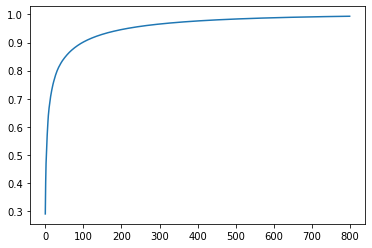

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

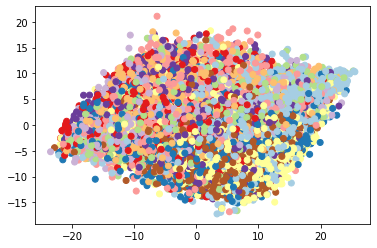

In [16]:
f =plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap=plt.cm.Paired)

## Etape 2 : on crée des groupes avec k-means

10
20
30
40
50
60
70
80
90


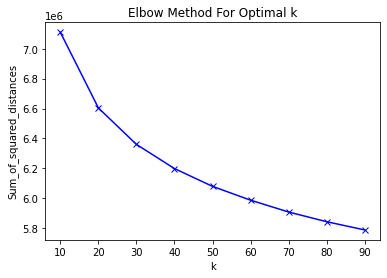

In [19]:
Sum_of_squared_distances = []
K = range(10,160,10)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X_pca[:,:531])
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=10, random_state=5).fit(X_pca[:,:531])

In [21]:
#pd.DataFrame(confusion_matrix(Y,kmeans.labels_, normalize='true'))
pd.DataFrame(np.around(confusion_matrix(Y, kmeans.labels_, normalize='pred') * 100, 0).astype(int))

,0,1,2,3,4,5,6,7,8,9
0,35,3,4,17,3,10,11,24,4,8
1,8,8,6,11,11,16,11,4,10,14
2,13,7,16,4,14,6,8,13,12,5
3,9,15,11,3,11,9,10,11,14,6
4,4,19,15,4,15,5,5,8,12,5
5,6,17,11,2,8,16,8,15,11,3
6,6,9,14,1,18,7,10,3,22,2
7,4,15,14,5,10,7,15,7,6,12
8,8,4,2,36,2,16,5,12,4,15
9,6,3,5,17,8,8,16,3,3,29


In [0]:
kmeans_all = KMeans(n_clusters=10, random_state=5).fit(X)

In [24]:
pd.DataFrame(np.around(confusion_matrix(Y, kmeans_all.labels_, normalize='pred') * 100, 0).astype(int))

,0,1,2,3,4,5,6,7,8,9
0,4,4,24,11,17,10,8,3,34,3
1,10,6,4,11,11,16,14,8,8,11
2,12,16,13,8,4,6,5,7,13,14
3,14,11,11,10,3,9,6,15,9,11
4,12,15,8,5,4,5,5,19,4,15
5,11,11,15,8,2,16,4,17,6,8
6,22,14,3,10,1,7,2,9,6,18
7,6,14,7,15,5,7,12,15,4,10
8,4,2,13,5,36,16,15,4,9,2
9,3,5,3,16,17,8,29,3,6,8


## Etape 3 : on regroupe ces groupes en 10 classes avec CAH



In [37]:
cah = AgglomerativeClustering(linkage="ward",n_clusters=10)
cah.fit_predict(kmeans.cluster_centers_)

array([7, 0, 9, 6, 0, 2, 2, 7, 8, 3, 2, 4, 2, 1, 9, 3, 0, 0, 5, 6, 7, 7,
       7, 4, 0, 9, 3, 2, 6, 9, 4, 8, 0, 0, 7, 8, 5, 4, 7, 3, 8, 2, 8, 7,
       7, 6, 0, 2, 4, 3, 3, 2, 3, 0, 1, 2, 1, 6, 0, 0, 3, 5, 7, 2, 0, 8,
       5, 7, 2, 2, 8, 3, 4, 2, 1, 2, 1, 4, 6, 5, 6, 0, 1, 4, 3, 2, 3, 3,
       1, 7, 4, 4, 3, 2, 5, 6, 5, 0, 0, 5])

In [3]:
cah = AgglomerativeClustering(linkage="ward",n_clusters=10)
cah.fit_predict(X_pca[1000,:32])


NameError: ignored